# Score 59.33 %

In [1]:
import os
os.sys.path.append("/Users/pbezuhov/git/custom_libraries/")
import main as m

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

training_data = pd.read_csv('../data/titanic/train.csv')
testing_data = pd.read_csv('../data/titanic/test.csv')

In [26]:
mod_training_data = training_data.dropna()
mod_training_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
predictors = ['Age', 'Sex', 'Pclass', 'SibSp', 'Fare', 'Parch', 'Cabin', 'Embarked']

y = mod_training_data.Survived
x = mod_training_data[predictors]

In [28]:
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"
    
x.Cabin = x.Cabin.apply(clean_cabin)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [42]:
class1 = list()
class2 = list()
class3 = list()

for i in range(len(x.Pclass)):
    if(x.Pclass.as_matrix()[i] == 1):
        class1.append(1)
    else:
        class1.append(0)
    if(x.Pclass.as_matrix()[i] == 2):
        class2.append(1)
    else:
        class2.append(0)
    if(x.Pclass.as_matrix()[i] == 3):
        class3.append(1)
    else:
        class3.append(0)
        
x["Pclass_1"] = class1
x["Pclass_2"] = class2
x["Pclass_3"] = class3
x.drop(['Pclass'], axis=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

,Age,Sex,SibSp,Fare,Parch,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
1,38.0,female,1,71.2833,0,C,C,1,0,0
3,35.0,female,1,53.1000,0,C,S,1,0,0
6,54.0,male,0,51.8625,0,E,S,1,0,0
10,4.0,female,1,16.7000,1,G,S,0,0,1
11,58.0,female,0,26.5500,0,C,S,1,0,0
21,34.0,male,0,13.0000,0,D,S,0,1,0
23,28.0,male,0,35.5000,0,A,S,1,0,0
27,19.0,male,3,263.0000,2,C,S,1,0,0
52,49.0,female,1,76.7292,0,D,C,1,0,0
54,65.0,male,0,61.9792,1,B,C,1,0,0


In [43]:
ohe_x = pd.get_dummies(x)

train_x, val_x, train_y, val_y = train_test_split(ohe_x.as_matrix(), y.as_matrix(), test_size=0.30)

In [44]:
ohe_x

,Age,Pclass,SibSp,Fare,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
1,38.0,1,1,71.2833,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,35.0,1,1,53.1000,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
6,54.0,1,0,51.8625,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
10,4.0,3,1,16.7000,1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
11,58.0,1,0,26.5500,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
21,34.0,2,0,13.0000,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
23,28.0,1,0,35.5000,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
27,19.0,1,3,263.0000,2,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
52,49.0,1,1,76.7292,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
54,65.0,1,0,61.9792,1,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [45]:
rates = list()
scores = list()
for i in range(1, 100):
    i = i / 100
    pipeline = make_pipeline(Imputer(), XGBRegressor(learning_rate=i))
    pipeline.fit(train_x, train_y)

    validation_results = pipeline.predict(val_x)
    val_results_to_binary = m.to_discrete(list(validation_results), 0, 1)
    results = m.percent_right(val_results_to_binary, val_y)
    
    rates.append(i)
    scores.append(results)

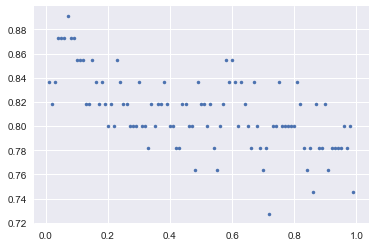

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(rates, scores, ".")
plt.show()

In [50]:
max_rate = [rates[i] for i in range(len(rates)) if scores[i] == max(scores)]
max_rate

[0.07]

In [51]:
pipeline = make_pipeline(Imputer(), XGBRegressor(learning_rate=0.07))
pipeline.fit(train_x, train_y)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('xgbregressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

In [52]:
test_x = testing_data[predictors]

In [53]:
class1 = list()
class2 = list()
class3 = list()

for i in range(len(test_x.Pclass)):
    if(test_x.Pclass.as_matrix()[i] == 1):
        class1.append(1)
    else:
        class1.append(0)
    if(test_x.Pclass.as_matrix()[i] == 2):
        class2.append(1)
    else:
        class2.append(0)
    if(test_x.Pclass.as_matrix()[i] == 3):
        class3.append(1)
    else:
        class3.append(0)
        
test_x["Pclass_1"] = class1
test_x["Pclass_2"] = class2
test_x["Pclass_3"] = class3
test_x.drop(['Pclass'], axis=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Age,Sex,SibSp,Fare,Parch,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,34.5,male,0,7.8292,0,NaN,Q,0,0,1
1,47.0,female,1,7.0000,0,NaN,S,0,0,1
2,62.0,male,0,9.6875,0,NaN,Q,0,1,0
3,27.0,male,0,8.6625,0,NaN,S,0,0,1
4,22.0,female,1,12.2875,1,NaN,S,0,0,1
5,14.0,male,0,9.2250,0,NaN,S,0,0,1
6,30.0,female,0,7.6292,0,NaN,Q,0,0,1
7,26.0,male,1,29.0000,1,NaN,S,0,1,0
8,18.0,female,0,7.2292,0,NaN,C,0,0,1
9,21.0,male,2,24.1500,0,NaN,S,0,0,1


In [54]:
test_x.Cabin = test_x.Cabin.apply(clean_cabin)
test_x = pd.get_dummies(test_x)
test_x

,Age,Pclass,SibSp,Fare,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Embarked_C,Embarked_Q,Embarked_S
0,34.5,3,0,7.8292,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
1,47.0,3,1,7.0000,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
2,62.0,2,0,9.6875,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,27.0,3,0,8.6625,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
4,22.0,3,1,12.2875,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
5,14.0,3,0,9.2250,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
6,30.0,3,0,7.6292,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
7,26.0,2,1,29.0000,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
8,18.0,3,0,7.2292,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0
9,21.0,3,2,24.1500,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [55]:
predictions = pipeline.predict(test_x.as_matrix())
predictions = m.to_discrete(predictions, 0, 1)
predictions = predictions.astype(int)

In [56]:
columns = ["PassengerId", "Survived"]
ids = testing_data['PassengerId'].as_matrix()
data = list(zip(ids, list(predictions)))
m.save_file('/Users/pbezuhov/git/Kaggle/submissions/titanic/9_learning_rate_pclass.csv', data, columns)